# Final Project Submission

Please fill out:
* Student name: Joshua Ruggles
* Student pace: **self paced** / part time / full time
* Scheduled project review date/time: 
* Instructor name: Joe Comeaux
* Blog post URL: 


# Version Updates
* 8/5/2022: Linked tables to get IMDb database to show movie title and budget information on same table. 
* 8/7/2022: The Numbers database brought in to pull information on initial budget and worldwide gross to calculate out return on investment (ROI). 
* 8/8/2022: After meeting with Joe, we are going to try using an ROI percentage of 500% instead of 5000%. We deemed that the pool of films was too small to glean any real information from. Home repository linked to Phase 1 Project repository as we near version completion. 
* 8/9/2022: Addition of visuals
* 8/11/2022: Utilized df.explode() to separate genres to get more substantial results on the genre column. 
* 8/17/2022: After speaking with Joe again, we have narrowed down four identifiable metrics to tell us which film genre costs the most to make, which genre gives us the most ROI, which genre makes the most in regards to worldwide gross, and which film genre is the most critically acclaimed. 

# Microsoft Film Studio Project

## Project Goal 

This project aims to aid Microsoft and their newly founded film studio in figuring out what kind of movie to make based on analysis of what are considered to be both good and profitable films. 

Based on a rubric of at least a 6.14 average user score on IMDb and a ROI(return on investment) percentage of 500% or better we will break down what genre is most suitable to pursue. 

Once we have this database set, our project goal is to identify four components in our film dataset, split by genre: 

* Highest worldwide gross by genre 
* Initial Budget by genre
* Highest ROI percentage in genre
* Highest rated genre

## Data Source and Data Exploration

The data used was provided to us via the original project repository. We mainly utilized IMDb database, as well as thenumbers.com database. From the IMDb database we utilized the following: 

* IMDb ratings database for average user ratings on films. 
* IMDb basics database for information on films: genre, film title, and runtime. 

From thenumbers.com database we utilized the following: 

* Website dataframe with information on initial budget, domestic, and worldwide gross. 
* ROI(return on investment) percentage was found dividing initial budget into worldwide gross and multiplying by 100. 

Based on our initial proposal, we deemed originally that any film with a 7 or above IMDb rating and an ROI percentage of 5000% were worthy of replicating. Unfortunately this made too small a sample size; we were able to discern through our original query that the true average score of films in our IMDb database is a 6.14 and that 5000% ROI was too narrow of a pathway for our first film's successful voyage. 

## Import packages for analysis
* Panel data package to read table information
* Matplotlib and matplotlib inline to create visuals 
* Numpy to assist in visual creation 
* Seaborn to assist in visual creation 
* Sqlite3 to assist with sql-style syntax on panel dataframes
* zipfile to assist with opening zipped packages

In [2]:
# Import relevant packages
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns
import sqlite3
import zipfile
# Import sqldf to use sql-style syntax on our pandas dataframes
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

## Bringing in our first sets of data from IMDb

Our title.basics file holds most of the information that we need from IMDb, however it does not hold user scores. We will import a second file from IMDb, the title.ratings table to give us some insight into what people think of these films. 

In [3]:
# open IMDB csv file in pandas
basics_tsv_file ="zippedData\\title.basics.tsv.gz"
basics = pd.read_csv(basics_tsv_file, sep='\t',low_memory=False)
# preview basics dataframe from IMDB 
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
# basic info on basics dataframe
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9121677 entries, 0 to 9121676
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 626.3+ MB


In [5]:
# open ratings csv file in pandas
ratings_tsv_file = "zippedData\\title.ratings.tsv.gz"
ratings = pd.read_csv(ratings_tsv_file, sep='\t',low_memory=False)
# preview ratings dataframe
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1902
1,tt0000002,5.9,255
2,tt0000003,6.5,1697
3,tt0000004,5.7,167
4,tt0000005,6.2,2517


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258315 entries, 0 to 1258314
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1258315 non-null  object 
 1   averageRating  1258315 non-null  float64
 2   numVotes       1258315 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.8+ MB


## Merging IMDb databases

There is pertinent information that we need from both tables. Why don't we merge on a like column? 

In [7]:
# merge pandas dataframe on like column, 'tconst'
joined_df = basics.merge(ratings, how='inner', on = 'tconst')
joined_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1902
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.9,255
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1697
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.7,167
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2517


In [8]:
# Query the titleType to see unique descriptors
joined_df['titleType'].unique()

array(['short', 'movie', 'tvEpisode', 'tvSeries', 'tvShort', 'tvMovie',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

## Movies, movies, movies! 

Since we are interested in creating a film studio, we should look only at movies, naturally. 

In [9]:
# stripped_df will only show us movies now
stripped_df = joined_df[joined_df['titleType'].isin(['movie'])]
stripped_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,198
337,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,14
371,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,778
380,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,4.7,19
395,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,23


In [10]:
stripped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280616 entries, 8 to 1258309
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          280616 non-null  object 
 1   titleType       280616 non-null  object 
 2   primaryTitle    280616 non-null  object 
 3   originalTitle   280616 non-null  object 
 4   isAdult         280616 non-null  object 
 5   startYear       280616 non-null  object 
 6   endYear         280616 non-null  object 
 7   runtimeMinutes  280616 non-null  object 
 8   genres          280616 non-null  object 
 9   averageRating   280616 non-null  float64
 10  numVotes        280616 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 25.7+ MB


# The Scatterplot Thickens

Let's plot the information that we have from our IMDb database to see what the average score for a movie title seems to be. 

''

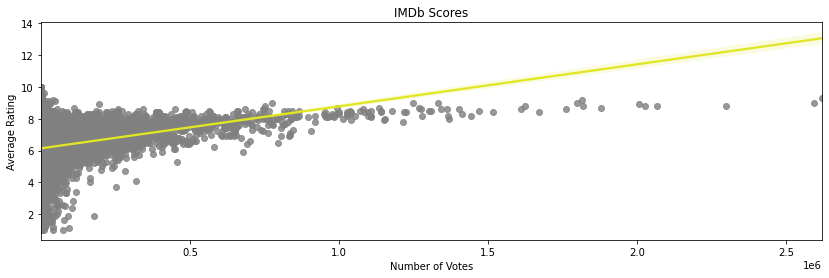

In [11]:
plt.figure(figsize = (14,4))
plt.xticks(range(len(['numVotes'])))
df = sns.regplot(x='numVotes',
            y='averageRating',

            data= stripped_df,
            scatter_kws={"color": '#808080'},
            line_kws={"color": '#E0E722'})
# df.xaxis.set_ticks(['500', '1000', '1500', '2000', '2500'])
# df.xaxis.set_ticklabels(['500', '1000', '1500', '2000', '2500'])
# df.set_xticklabels(['500', '1000', '1500', '2000', '2500'])
df.set_ylabel('Average Rating')
df.set_xlabel('Number of Votes')
df.set_title('IMDb Scores')
df.set_xscale('linear')
# df.set_yscale('log')
;

In [12]:
stripped_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,198
337,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,14
371,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,778
380,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,4.7,19
395,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,23


In [13]:
stripped_df['numVotes'].max()

2620256

In [14]:
stripped_df['averageRating'].mean()

6.14651766114548

## Cleaning IMDb databases

It is a commonly held belief that a film with a score of 7 or higher is considered "good"; 7 is the score goal we will attempt to replicate and thus we should remove any film with a score lower than the average, 6.14

Additional documentation: https://www.dr-lex.be/info-stuff/movieratings.html

In [15]:
# Use sql query on stripped_df to get our most useful information! 
q= """
SELECT titleType, primaryTitle, genres, averageRating, runtimeMinutes
  FROM stripped_df
    WHERE averageRating >= '6.14'
"""
sql_stripped_again_df = pysqldf(q)
sql_stripped_again_df

,titleType,primaryTitle,genres,averageRating,runtimeMinutes
0,movie,Amor fatal,"Drama,Romance",6.9,\N
1,movie,The Battle of Trafalgar,War,7.7,51
2,movie,Der fremde Vogel,\N,6.2,45
3,movie,Oedipus Rex,Drama,6.3,56
4,movie,Anfisa,Drama,7.0,\N
...,...,...,...,...,...
151042,movie,Drømmeland,Documentary,6.4,72
151043,movie,The Rehearsal,Drama,7.2,51
151044,movie,Coven,"Drama,History",6.4,92
151045,movie,Kuambil Lagi Hatiku,Drama,8.3,123


In [16]:
# Looks like there are some null values for genre, let's see what other values are in genre.
sql_stripped_again_df['genres'].unique()

array(['Drama,Romance', 'War', '\\N', ..., 'Documentary,Horror,Sci-Fi',
       'Documentary,Family,Sci-Fi', 'Action,Documentary,Mystery'],
      dtype=object)

## How long is a 'movie'? 

* According to studiobinder.com, a feature length film is anywhere from 80 to 180 minutes. 

Further research: https://www.studiobinder.com/blog/what-is-a-feature-film-definition/#:~:text=A%20feature%20film%20is%20a,a%20minimum%20of%2040%20minutes.

In [17]:
# To more easily rid ourselves of having to parse through short film data, let's make a minimum runtime of 60 minutes, and 
# take out any null values
q= """
SELECT titleType, primaryTitle, genres, averageRating, runtimeMinutes
  FROM stripped_df
    WHERE averageRating >= '6.14' AND runtimeMinutes >= '80' AND runtimeMinutes != '\\N' AND runtimeMinutes !='9'
"""
sql_stripped_again_df1 = pysqldf(q)
sql_stripped_again_df1
# Uncertain why, but if not specified, there are three films in this database with a runtime of '9' minutes. 

,titleType,primaryTitle,genres,averageRating,runtimeMinutes
0,movie,Passion,"Biography,Drama,Romance",6.6,85
1,movie,Ingeborg Holm,Drama,7.0,96
2,movie,Love Everlasting,Drama,6.2,90
3,movie,Fantômas: The Dead Man Who Killed,"Crime,Drama,Mystery",6.9,90
4,movie,The Student of Prague,"Drama,Fantasy,Horror",6.4,85
...,...,...,...,...,...
56509,movie,Albatross,Documentary,8.3,97
56510,movie,Blind Ambition,Documentary,7.9,96
56511,movie,The Last White Witch,"Comedy,Drama,Fantasy",7.7,97
56512,movie,Nuestra película,Documentary,6.8,96


In [18]:
# The same for runtimeMinutes while we are at it. 
sql_stripped_again_df1['runtimeMinutes'].unique()

array(['85', '96', '90', '84', '82', '80', '88', '97', '87', '95', '86',
       '92', '81', '99', '94', '93', '91', '89', '83', '98', '873', '999',
       '840', '9000', '808'], dtype=object)

 56,514 still seems to be a lot of films to consider. While, technically we can stop here, count out the genre of films 
 and consider this a win, this would only satisfy half of our initial query. To consider return on investment, let's
 bring in another set of information. 

## By 'the_numbers': Bringing in our $ database

 This is the numbers database from https://www.the-numbers.com/, information on how much budget a film had to work with as well as other pertinent info, 
 like how much $$$ they made. 

In [19]:
numbers_tsv = "zippedData\\tn.movie_budgets.csv.gz"
numbers_tsv = pd.read_csv(numbers_tsv)
# preview ratings dataframe
numbers_tsv

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [20]:
# Let's make movie title our index. 
numbers_tsv1 = numbers_tsv.set_index('movie')
numbers_tsv1.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
# Little more information on numbers_tsv is needed. 
numbers_tsv1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Avatar to My Date With Drew
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(4)
memory usage: 271.0+ KB


## ROI percentage

Our return on investment (ROI) is a simple calculation, we take the worldwide gross of a film, divide that by the production budget and multiply by 100. This gives us our ROI percentage, current target 5000%

In [22]:
# Currently, we cannot perform any math equations on any of the columns not labeled 'id', so let's take out any 
# punctuation, first. 
numbers_tsv1['production_budget'] = numbers_tsv1['production_budget'].str.replace(',','')
numbers_tsv1['production_budget'] = numbers_tsv1['production_budget'].str.replace('$','')
# The same on our 'worldwide_gross column'
numbers_tsv1['worldwide_gross'] = numbers_tsv1['worldwide_gross'].str.replace(',','')
numbers_tsv1['worldwide_gross'] = numbers_tsv1['worldwide_gross'].str.replace('$','')

In [23]:
# We need to make these two columns into integer columns that play more nicely with the division function we are going
# to be putting it through.
numbers_tsv1['production_budget'] = numbers_tsv1['production_budget'].astype('int64')
numbers_tsv1['worldwide_gross'] = numbers_tsv1['worldwide_gross'].astype('int64')

In [24]:
# Here we can create our 'ROI' column and preview how most films do! 
numbers_tsv1['ROI'] = (numbers_tsv1['worldwide_gross'] / numbers_tsv1['production_budget']) *100
numbers_tsv1['ROI'].head()

movie
Avatar                                         653.257713
Pirates of the Caribbean: On Stranger Tides    254.667286
Dark Phoenix                                    42.789243
Avengers: Age of Ultron                        424.384139
Star Wars Ep. VIII: The Last Jedi              415.369636
Name: ROI, dtype: float64

In [25]:
# Quick preview to make sure that our 'ROI' column is where it should be before we begin formatting our table. 
numbers_tsv1.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI
movie,,,,,,
Avatar,1,"Dec 18, 2009",425000000,"$760,507,625",2776345279,653.257713
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,"$241,063,875",1045663875,254.667286
Dark Phoenix,3,"Jun 7, 2019",350000000,"$42,762,350",149762350,42.789243
Avengers: Age of Ultron,4,"May 1, 2015",330600000,"$459,005,868",1403013963,424.384139
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,"$620,181,382",1316721747,415.369636


In [26]:
# Let's format our numbers table to hold only the information necessary prior to pivoting into the stripped dataframe
q= """
SELECT movie, production_budget, ROI, worldwide_gross
  FROM numbers_tsv1
"""
numbers_tsv1 = pysqldf(q)
numbers_tsv1

,movie,production_budget,ROI,worldwide_gross
0,Avatar,425000000,653.257713,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,254.667286,1045663875
2,Dark Phoenix,350000000,42.789243,149762350
3,Avengers: Age of Ultron,330600000,424.384139,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,415.369636,1316721747
...,...,...,...,...
5777,Red 11,7000,0.000000,0
5778,Following,6000,4008.250000,240495
5779,Return to the Land of Wonders,5000,26.760000,1338
5780,A Plague So Pleasant,1400,0.000000,0


In [27]:
# Let's rename a column from the stripped dataframe to get us a matching column name to pivot upon. 
sql_stripped_again_df1.rename(columns = {'primaryTitle':'movie'}, inplace = True)
sql_stripped_again_df1['movie'].head()

0                              Passion
1                        Ingeborg Holm
2                     Love Everlasting
3    Fantômas: The Dead Man Who Killed
4                The Student of Prague
Name: movie, dtype: object

In [28]:
numbers_tsv1.rename(columns = {'movie':'movie'}, inplace = True)
numbers_tsv1['movie'].head()

0                                         Avatar
1    Pirates of the Caribbean: On Stranger Tides
2                                   Dark Phoenix
3                        Avengers: Age of Ultron
4              Star Wars Ep. VIII: The Last Jedi
Name: movie, dtype: object

## Combining IMDB and the numbers databases

IMDb has information on ratings and thenumbers.com will show us our ROI percentages, all on one table!

In [29]:
# Now let's combine both tables on the movie column
q = """
SELECT  movie, genres, averageRating, production_budget, ROI, worldwide_gross
  FROM sql_stripped_again_df1
    JOIN numbers_tsv1
      USING (movie)
;
"""
ROI_Ratings = pysqldf(q)
ROI_Ratings

,movie,genres,averageRating,production_budget,ROI,worldwide_gross
0,Wuthering Heights,Drama,7.3,8000000,34.019175,2721534
1,Destiny,"Drama,Fantasy,Horror",7.6,750000,0.060000,450
2,Oliver Twist,Drama,6.7,65000000,41.032185,26670920
3,Pan,Drama,6.6,150000000,101.017315,151525973
4,Rob Roy,Adventure,6.9,28000000,112.109239,31390587
...,...,...,...,...,...,...
1642,Alive,"Adventure,Biography,Drama",6.9,32000000,113.436469,36299670
1643,Faithful,Drama,6.6,13000000,16.187992,2104439
1644,The Grey,"Drama,Mystery",6.7,25000000,324.996704,81249176
1645,Sublime,"Biography,Documentary,Music",6.8,1800000,0.000000,0


## 5000% ROI 

Let's see what our selection of films is with a 5000% ROI and an IMDb score of 6.14 or above! 

In [30]:
q = """
SELECT  movie, genres, averageRating, production_budget, ROI, worldwide_gross
  FROM ROI_Ratings

    WHERE ROI >= 5000
      ORDER BY ROI DESC
;
"""
ROI_Ratings1 = pysqldf(q)
ROI_Ratings1.head()

,movie,genres,averageRating,production_budget,ROI,worldwide_gross
0,Mad Max,"Action,Adventure,Sci-Fi",6.8,200000,49875.000000,99750000
1,Paranormal Activity,"Horror,Mystery",6.3,450000,43151.785333,194183034
2,The Blair Witch Project,"Horror,Mystery",6.5,600000,41383.333333,248300000
3,El Mariachi,"Action,Crime,Thriller",6.8,7000,29170.400000,2041928
4,Night of the Living Dead,"Horror,Thriller",7.8,114000,26392.161404,30087064


In [31]:
ROI_Ratings1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              31 non-null     object 
 1   genres             31 non-null     object 
 2   averageRating      31 non-null     float64
 3   production_budget  31 non-null     int64  
 4   ROI                31 non-null     float64
 5   worldwide_gross    31 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.6+ KB


In [32]:
ROI_Not_Quite = ROI_Ratings1.drop_duplicates('movie')
ROI_Not_Quite.head(20)

,movie,genres,averageRating,production_budget,ROI,worldwide_gross
0,Mad Max,"Action,Adventure,Sci-Fi",6.8,200000,49875.000000,99750000
1,Paranormal Activity,"Horror,Mystery",6.3,450000,43151.785333,194183034
2,The Blair Witch Project,"Horror,Mystery",6.5,600000,41383.333333,248300000
3,El Mariachi,"Action,Crime,Thriller",6.8,7000,29170.400000,2041928
4,Night of the Living Dead,"Horror,Thriller",7.8,114000,26392.161404,30087064
6,Halloween,"Horror,Thriller",7.7,325000,21538.461538,70000000
7,The Brothers McMullen,"Comedy,Drama,Romance",6.6,50000,20853.012000,10426506
8,The Texas Chainsaw Massacre,"Crime,Horror",6.2,140000,18980.313571,26572439
9,Once,"Drama,Music,Romance",7.8,150000,15549.087333,23323631
10,Clerks,Comedy,7.7,27000,14423.111111,3894240


## Visualizing our information
So what does the number of films with an IMDb score of 6.14 or above and a 5000% ROI look like? 

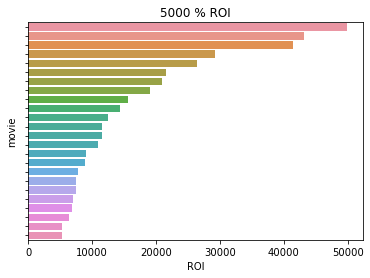

In [33]:
g = sns.barplot(
    data = ROI_Not_Quite, 
    x = 'ROI', 
    y = 'movie'
);
g.set(title = "5000 % ROI")
g.set(yticklabels = []);


## Did we make a mistake somewhere? 
Looking at this graph, certainly all of the films look to be at least a 5000% ROI based on the x-axis, but why are there so few of them? What else can we find out from them? 

In [34]:
ROI_Not_Quite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              24 non-null     object 
 1   genres             24 non-null     object 
 2   averageRating      24 non-null     float64
 3   production_budget  24 non-null     int64  
 4   ROI                24 non-null     float64
 5   worldwide_gross    24 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.9+ KB


## Are you feeling funny? 
The films in this database are most often comedies with an average production budget of $770,500

In [35]:
ROI_Not_Quite['genres'].mode()

0    Comedy,Drama
dtype: object

In [36]:
ROI_Not_Quite['production_budget'].mean()

770500.0

## This is too small of a sample

Perhaps 5000% ROI was too high of an expectation. While there are certainly films that fit the criteria of what we are looking for, a 6.14 or higher on IMDB as well as an ROI percentage of 5000 or higher, this seems to be too lofty a goal for our first venture out. There is simply too small of a list of films to pull from. Let's try 500%. Note, this is a completely arbitary number, 500% but I will defend this point, shortly. 

In [37]:
q = """
SELECT  movie, genres, averageRating, production_budget, ROI, worldwide_gross
  FROM ROI_Ratings

    WHERE ROI >= 500.0
      ORDER BY ROI DESC
;
"""
ROI_Ratings3 = pysqldf(q)
ROI_Ratings3.head()

,movie,genres,averageRating,production_budget,ROI,worldwide_gross
0,Mad Max,"Action,Adventure,Sci-Fi",6.8,200000,49875.000000,99750000
1,Paranormal Activity,"Horror,Mystery",6.3,450000,43151.785333,194183034
2,The Blair Witch Project,"Horror,Mystery",6.5,600000,41383.333333,248300000
3,El Mariachi,"Action,Crime,Thriller",6.8,7000,29170.400000,2041928
4,Night of the Living Dead,"Horror,Thriller",7.8,114000,26392.161404,30087064


In [38]:
ROI_Ratings3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              331 non-null    object 
 1   genres             331 non-null    object 
 2   averageRating      331 non-null    float64
 3   production_budget  331 non-null    int64  
 4   ROI                331 non-null    float64
 5   worldwide_gross    331 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 15.6+ KB


## 500% Visualization 

There are significantly more films that we can pull data from when we lower our desired ROI percentage. We do not always know how a dataset will reply to our query, so pulling back on our ROI expectations will ultimately net us more information, and hopefully a larger payday as well. 

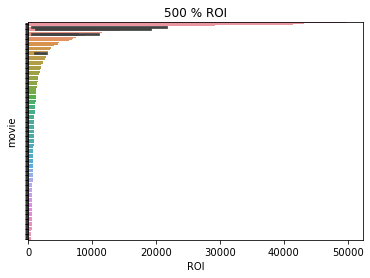

In [39]:
g1 = sns.barplot(
    data = ROI_Ratings3, 
    x = 'ROI', 
    y = 'movie',
);
g1.set(title = "500 % ROI")
g1.set(yticklabels = [])
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,10

In [40]:
ROI_Ratings3["genres_split"] = ROI_Ratings3["genres"].str.split(",")
df_new = ROI_Ratings3.explode("genres_split")
df_new.head(20)

,movie,genres,averageRating,production_budget,ROI,worldwide_gross,genres_split
0,Mad Max,"Action,Adventure,Sci-Fi",6.8,200000,49875.000000,99750000,Action
0,Mad Max,"Action,Adventure,Sci-Fi",6.8,200000,49875.000000,99750000,Adventure
0,Mad Max,"Action,Adventure,Sci-Fi",6.8,200000,49875.000000,99750000,Sci-Fi
1,Paranormal Activity,"Horror,Mystery",6.3,450000,43151.785333,194183034,Horror
1,Paranormal Activity,"Horror,Mystery",6.3,450000,43151.785333,194183034,Mystery
2,The Blair Witch Project,"Horror,Mystery",6.5,600000,41383.333333,248300000,Horror
2,The Blair Witch Project,"Horror,Mystery",6.5,600000,41383.333333,248300000,Mystery
3,El Mariachi,"Action,Crime,Thriller",6.8,7000,29170.400000,2041928,Action
3,El Mariachi,"Action,Crime,Thriller",6.8,7000,29170.400000,2041928,Crime
3,El Mariachi,"Action,Crime,Thriller",6.8,7000,29170.400000,2041928,Thriller


# Which film genre makes the most $$$? 

In [41]:
df_mean = df_new.groupby('genres_split', as_index=False).mean()
df_mean.head()

,genres_split,averageRating,production_budget,ROI,worldwide_gross
0,Action,6.820000,2.705948e+07,4153.773367,2.681179e+08
1,Adult,6.500000,2.100000e+07,1388.179783,2.404116e+08
2,Adventure,7.077778,4.638476e+07,2249.499169,3.938977e+08
3,Animation,7.271053,5.734254e+07,1793.881560,5.027614e+08
4,Biography,7.350000,2.938333e+06,1097.068939,2.607174e+07


In [42]:
q = """
SELECT * 
  FROM df_mean
    WHERE 'genres_split' != '\\N' 
;
"""
df_mean = pysqldf(q)
df_mean

,genres_split,averageRating,production_budget,ROI,worldwide_gross
0,Action,6.820000,2.705948e+07,4153.773367,2.681179e+08
1,Adult,6.500000,2.100000e+07,1388.179783,2.404116e+08
2,Adventure,7.077778,4.638476e+07,2249.499169,3.938977e+08
3,Animation,7.271053,5.734254e+07,1793.881560,5.027614e+08
4,Biography,7.350000,2.938333e+06,1097.068939,2.607174e+07
5,Comedy,7.006338,2.192055e+07,1812.147118,1.912656e+08
6,Crime,6.844828,1.624576e+07,2749.723977,1.236753e+08
7,Documentary,7.417391,1.194522e+07,1989.576252,1.021443e+08
8,Drama,6.902797,1.777542e+07,1788.810207,1.746787e+08
9,Family,7.057895,2.712775e+07,2331.799261,2.408727e+08


In [43]:
q = """
SELECT *
  FROM df_mean
      ORDER BY worldwide_gross DESC
;
"""
df_meanGross = pysqldf(q)
df_meanGross1 = df_meanGross.head(5)

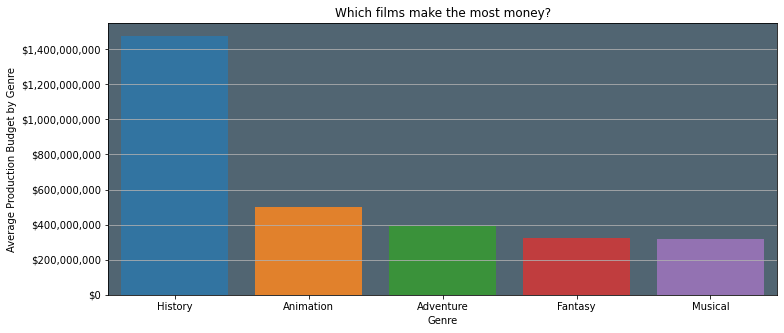

In [44]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots(figsize=(12,5))
plt.grid()
ax1.set_facecolor('xkcd:slate')
sns.barplot(data = df_meanGross1,
           x='genres_split',
            y= 'worldwide_gross'               
           )
ax1.set_title('Which films make the most money?')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Production Budget by Genre');

ax1.yaxis.set_major_formatter('${x:,.0f}')

ax1.yaxis.set_tick_params(which='major', labelcolor='black',
                         labelleft=True, labelright=False)



# ax1.legend(title= True)
# tick = mtick.StrMethodFormatter(fmt)
# ax1.yaxis.set_major_formatter(tick);

## Average worldwide gross per genre: 

* History films make $1.47 billion 

* Animation films make $500 million

* Adventure films make $400 million 

* Fantasy films make $320 million 

* Musicals make $316 million

History films on average make the most in terms of worldwide gross followed by animation, adventure, musicals and fantasy films. 

## Which films cost the most to make? 

In [45]:
q = """
SELECT *
  FROM df_mean
      ORDER BY production_budget DESC
;
"""
df_meanBudget = pysqldf(q)
df_meanBudget1 = df_meanBudget.head(5)

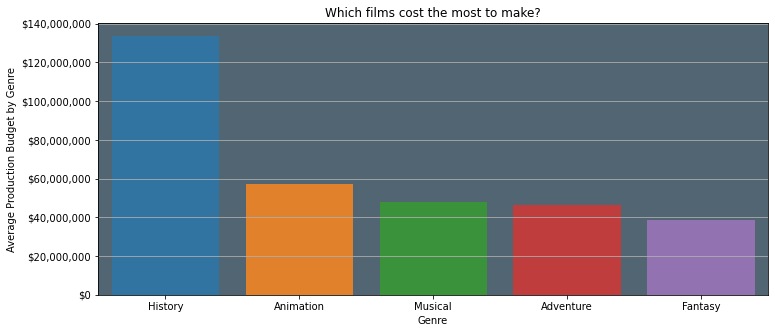

In [46]:
fig, ax1 = plt.subplots(figsize=(12,5))
plt.grid()
ax1.set_facecolor('xkcd:slate')
sns.barplot(data = df_meanBudget1,
           x='genres_split',
            y= 'production_budget'               
           )
ax1.set_title('Which films cost the most to make?')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Production Budget by Genre');

ax1.yaxis.set_major_formatter('${x:,.0f}')

ax1.yaxis.set_tick_params(which='major', labelcolor='black',
                         labelleft=True, labelright=False)


## Average cost of making a successful film in this genre: 
* History films cost $133.6 million

* Animation films cost $57.3 million 

* Muscial films cost $48.1 million 

* Adventure films cost $46.3 million 

* Fantasty films cost $38.6 million

## Further Considerations in regards to genre: 

* Musicals on average make less ROI than Adventure and Fantasy films with a similar initial budget. 

## What film genre has the highest ROI percentage? 

In [47]:
q = """
SELECT *
  FROM df_mean
      ORDER BY ROI DESC
;
"""
df_meanROI = pysqldf(q)
df_meanROI1 = df_meanROI.head(5)

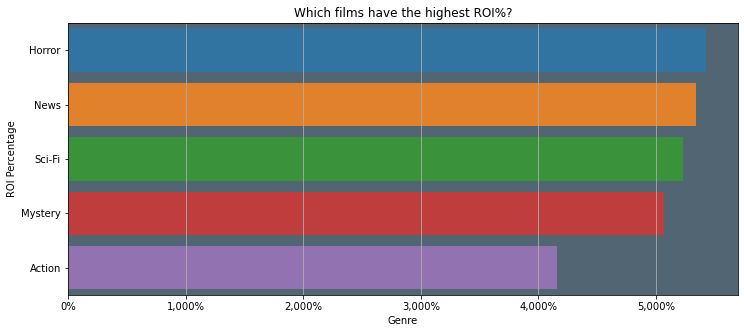

In [48]:
fig, ax1 = plt.subplots(figsize=(12,5))
plt.grid()
ax1.set_facecolor('xkcd:slate')
sns.barplot(data = df_meanROI1,
           x='ROI',
            y= 'genres_split'               
           )
ax1.set_title('Which films have the highest ROI%?')
ax1.set_xlabel('Genre')
ax1.set_ylabel('ROI Percentage');

ax1.xaxis.set_major_formatter('{x:,.0f}%')

ax1.xaxis.set_tick_params(which='major', labelcolor='black',
                         labelleft=True, labelright=False)


## Average ROI percentage by genre: 

* Horror films have a 5421.27% ROI with an intial investment of \\$10.5 million and a worldwide gross of $116 million

* News films have a 5336.59% ROI with a initial investment of \\$1 million and a worldwide gross of $53.3 million 

* Sci-fi films have a 5230.71% ROI with an initial investment of \\$18 million and a worldwide gross of $167 million 

* Mystery films have a 5067% ROI with an initial investment of \\$12 million and a worldwide gross of $152 million 

* Action films have a 4153% ROi with an initial investment of \\$27 million and a worldwide gross of $268 million 

## What film genre is the most highly rated? 

In [49]:
q = """
SELECT *
  FROM df_mean
      ORDER BY averageRating DESC
;
"""
df_meanRating = pysqldf(q)
dfmeanRating1 = df_meanRating.head(5)

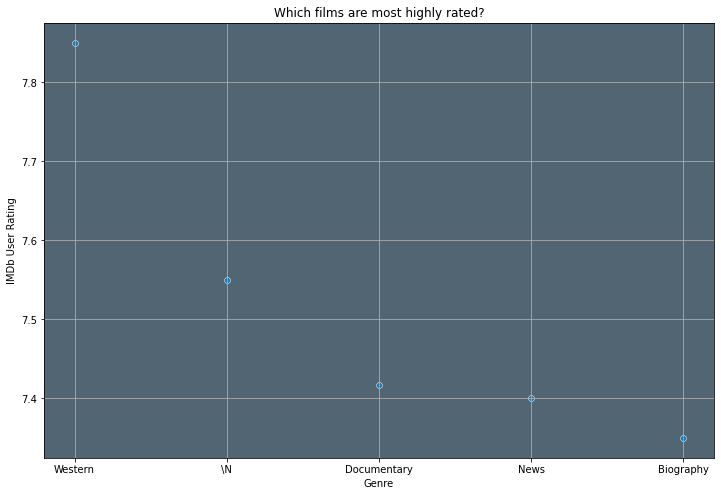

In [50]:
fig, ax1 = plt.subplots(figsize=(12,8))
plt.grid()
ax1.set_facecolor('xkcd:slate')
sns.scatterplot(data = dfmeanRating1,
           x='genres_split',
            y= 'averageRating'               
           )
ax1.set_title('Which films are most highly rated?')
ax1.set_xlabel('Genre')
ax1.set_ylabel('IMDb User Rating');

# ax1.yaxis.set_major_formatter('{x:,.0f}')

ax1.yaxis.set_tick_params(which='major', labelcolor='black',
                         labelleft=True, labelright=False)


## Average IMDb rating by genre: 

* Surprisingly, westerns have a very high score of a 7.85 on average on IMDb

* /N? 

* Documentaries on average have a 7.41

* News gets a 7.4

* Biography films on average get a 7.35



## What genre is '\N'? 

* Since '\N' is technically a null value, what does it represent? 

In [51]:
q = """
SELECT *
  FROM df_mean
     
        WHERE genres_split = '\\N'
;
"""
df_meanRating = pysqldf(q)
dfmeanRating1 = df_meanRating.head(5)

dfmeanRating1

,genres_split,averageRating,production_budget,ROI,worldwide_gross
0,\N,7.55,1100000.0,901.690175,12786821.5


In [52]:
df_count = df_new.groupby('genres_split', as_index=False).count()


In [53]:
df_mean = df_mean[0:24]

In [54]:
q = """
SELECT *
  FROM df_mean
      ORDER BY averageRating DESC
;
"""
df_meanRating = pysqldf(q)
dfmeanRating1 = df_meanRating.head(5)

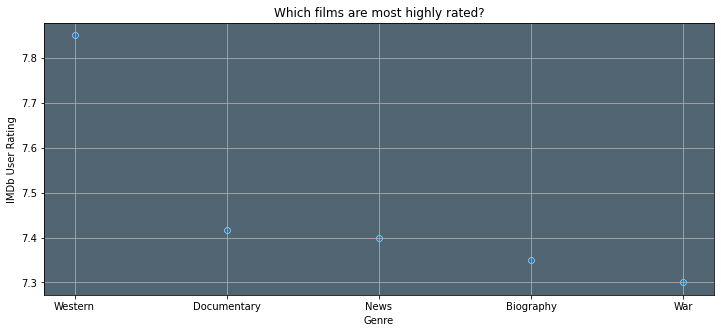

In [55]:
fig, ax1 = plt.subplots(figsize=(12,5))
plt.grid()
ax1.set_facecolor('xkcd:slate')
sns.scatterplot(data = dfmeanRating1,
           x='genres_split',
            y= 'averageRating'               
           )
ax1.set_title('Which films are most highly rated?')
ax1.set_xlabel('Genre')
ax1.set_ylabel('IMDb User Rating');

# ax1.yaxis.set_major_formatter('{x:,.0f}')

ax1.yaxis.set_tick_params(which='major', labelcolor='black',
                         labelleft=True, labelright=False)


## Average IMDb rating by genre: 

* Surprisingly, westerns have a very high score of a 7.85 on average on IMDb

* Documentaries on average have a 7.41

* News gets a 7.4

* Biography films on average get a 7.35

* War films are also highly rated with an average of 7.3

# What does it all mean? 



## For your consideration

* Let's find, within genres, which films are highest in regards to ROI & IMDb score. 

In [56]:
q = """
SELECT  movie, genres, averageRating, production_budget, ROI, worldwide_gross, genres_split
  FROM df_new

    WHERE ROI >= 500.0
      ORDER BY ROI DESC
;
"""
ROI_Final1 = pysqldf(q)

In [57]:
# ROI_Final1 = ROI_Ratings1.drop_duplicates('movie')
ROI_Final1.head()

,movie,genres,averageRating,production_budget,ROI,worldwide_gross,genres_split
0,Mad Max,"Action,Adventure,Sci-Fi",6.8,200000,49875.000000,99750000,Action
1,Mad Max,"Action,Adventure,Sci-Fi",6.8,200000,49875.000000,99750000,Adventure
2,Mad Max,"Action,Adventure,Sci-Fi",6.8,200000,49875.000000,99750000,Sci-Fi
3,Paranormal Activity,"Horror,Mystery",6.3,450000,43151.785333,194183034,Horror
4,Paranormal Activity,"Horror,Mystery",6.3,450000,43151.785333,194183034,Mystery


* Mad Max has the highest ROI percentage. 

In [58]:
q = """
SELECT  movie, genres, averageRating, production_budget, ROI, worldwide_gross, genres_split
  FROM df_new
ORDER BY averageRating DESC
;
"""
ROI_Final2 = pysqldf(q)

In [59]:
# ROI_Final5 = ROI_Final2.drop_duplicates('movie')
ROI_Final2.head()

,movie,genres,averageRating,production_budget,ROI,worldwide_gross,genres_split
0,Big,Documentary,8.9,18000000,842.60430,151668774,Documentary
1,Home,Documentary,8.5,500000,8958.63360,44793168,Documentary
2,The Visit,"Comedy,Drama,Romance",8.5,5000000,1973.55632,98677816,Comedy
3,The Visit,"Comedy,Drama,Romance",8.5,5000000,1973.55632,98677816,Drama
4,The Visit,"Comedy,Drama,Romance",8.5,5000000,1973.55632,98677816,Romance


* Big has the highest IMDb score in our database.

## Further Considerations

* Mad Max has the highest ROI percentage of any of the films we looked at today with an ROI percentage of 49875%, genres fall under Action, Adventure, and Sci-Fi. 

* Big has an average IMDb score of 8.9 and is a documentary. Documentaries are also on average the second highest rated genre on IMDb. 

## Conclusions

* History films have the potential historically (no pun intended, I swear) to make the most $$$, unfortunately they also cost the most to create. 

* Horror films on average have the most ROI, however that also seems to be because horror films in general start with a fairly modest average budget of \\$10.5 million (compared to the average history film's budget of $133 million). 

* The Western genre does very well with viewer scores if we are interested in solely making a good film with an average IMDb score of 7.85